# Intern Machine Learning Developer Practical Test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [2]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Coun

In [3]:
print(df.isnull().sum())

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


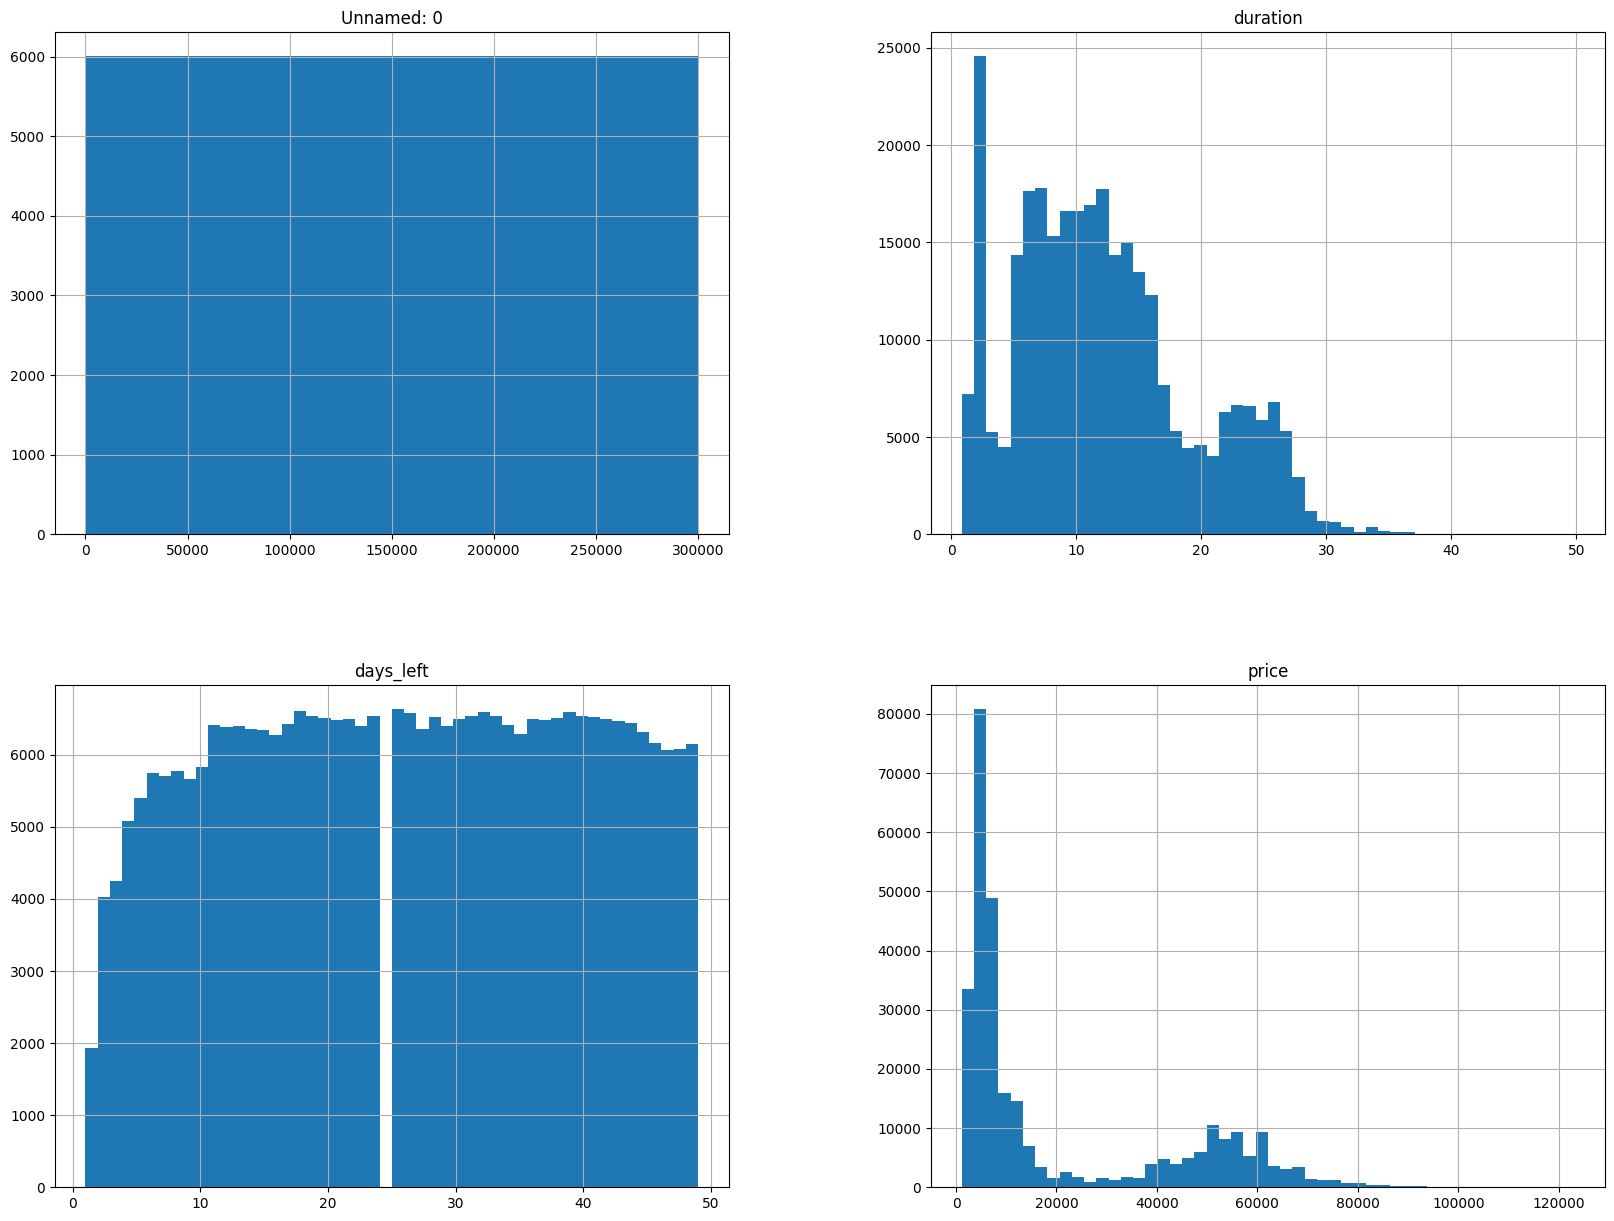

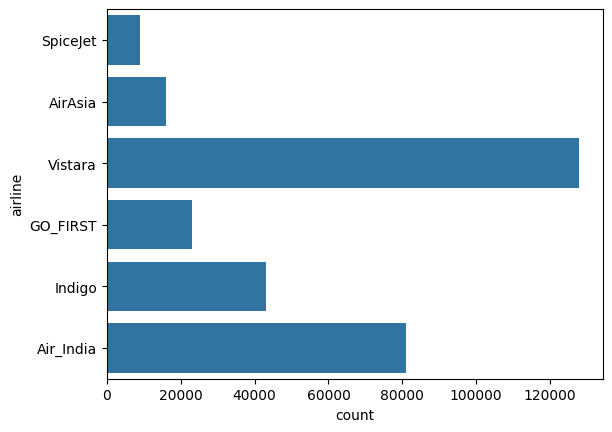

In [4]:
df.hist(bins=50, figsize=(20,15))
plt.show()
sns.countplot(y='airline', data=df)
plt.show()

Column names: Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')


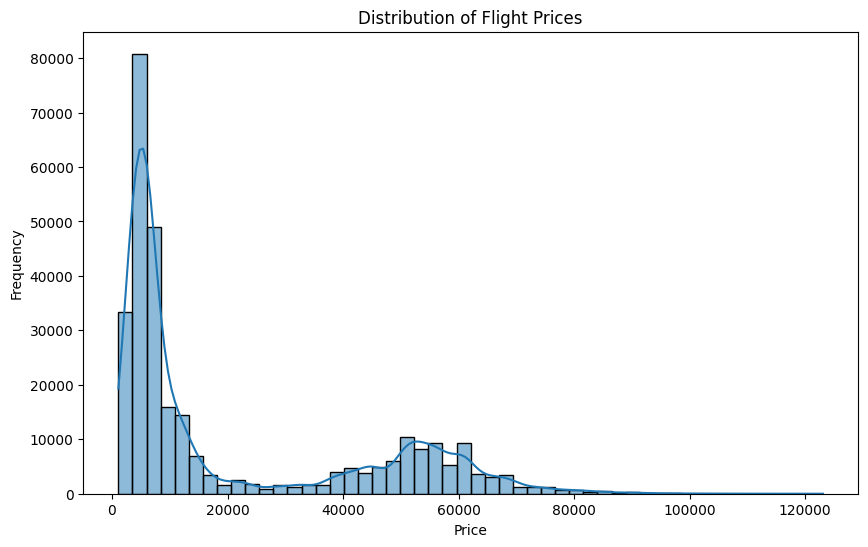

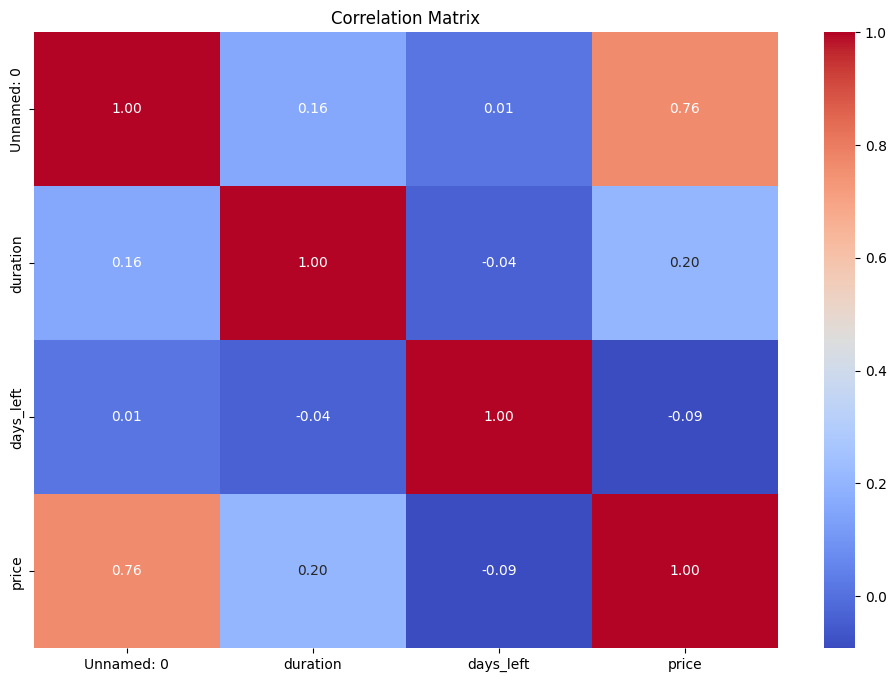

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Column names:", df.columns)

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

duration    float64
price         int64
dtype: object


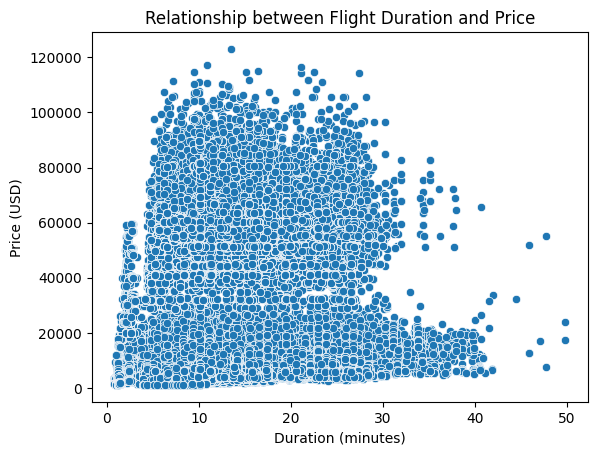

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.dropna(subset=['duration', 'price'])

df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
print(df[['duration', 'price']].dtypes)

sns.scatterplot(x='duration', y='price', data=df)
plt.title('Relationship between Flight Duration and Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price (USD)')
plt.show()

In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(X_train.dtypes)  
print(X_train.head())
print(X_test.head())

Training set size: (240122, 1591)
Test set size: (60031, 1591)
Unnamed: 0                    0
duration                      0
days_left                     0
airline_Air_India             0
airline_GO_FIRST              0
                             ..
destination_city_Delhi        0
destination_city_Hyderabad    0
destination_city_Kolkata      0
destination_city_Mumbai       0
class_Economy                 0
Length: 1591, dtype: int64
Unnamed: 0                    0
duration                      0
days_left                     0
airline_Air_India             0
airline_GO_FIRST              0
                             ..
destination_city_Delhi        0
destination_city_Hyderabad    0
destination_city_Kolkata      0
destination_city_Mumbai       0
class_Economy                 0
Length: 1591, dtype: int64
Unnamed: 0                      int64
duration                      float64
days_left                       int64
airline_Air_India                bool
airline_GO_FIRST           

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])
print("\nScaled Testing Data (first 5 rows):")
print(X_test_scaled[:5])

Scaled Training Data (first 5 rows):
[[-0.01886565  1.00173042 -1.47488258 ... -0.44439907 -0.49534037
   0.67246146]
 [-1.3059255  -0.72463441 -0.95897275 ... -0.44439907 -0.49534037
   0.67246146]
 [ 1.43638965  1.24497828  1.32577077 ... -0.44439907 -0.49534037
  -1.48707407]
 [ 0.18860926 -0.27288838 -1.10637556 ... -0.44439907 -0.49534037
   0.67246146]
 [ 1.41551523  1.98584177 -1.54858398 ... -0.44439907 -0.49534037
  -1.48707407]]

Scaled Testing Data (first 5 rows):
[[-1.41840967  1.04760002  1.03096515 ...  2.25022971 -0.49534037
   0.67246146]
 [ 1.3478378  -0.33126787  1.17836796 ... -0.44439907  2.01881383
  -1.48707407]
 [-0.101821   -0.23813869  1.10466656 ... -0.44439907 -0.49534037
   0.67246146]
 [ 1.59560761  0.31785643 -0.88527135 ... -0.44439907 -0.49534037
  -1.48707407]
 [-0.60832286 -0.55088594 -0.44306293 ... -0.44439907  2.01881383
   0.67246146]]


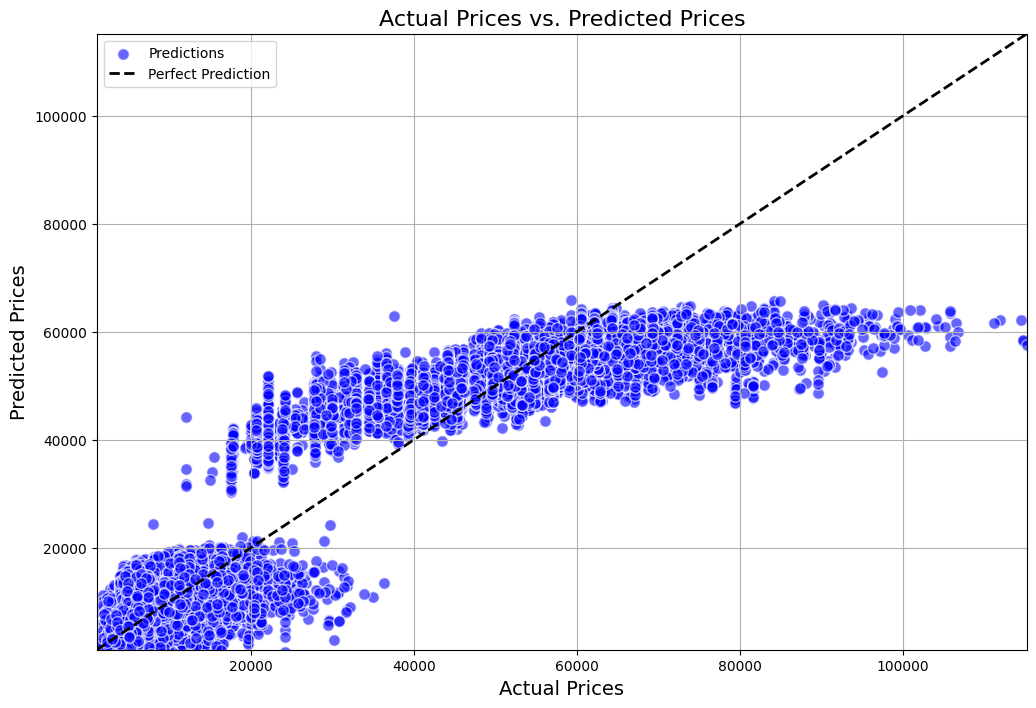

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Clean_Dataset.csv')
df = df.drop('Unnamed: 0', axis=1)

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

plt.figure(figsize=(12, 8))
plt.scatter(y_test, predictions, alpha=0.6, edgecolor='w', s=70, c='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.title('Actual Prices vs. Predicted Prices', fontsize=16)
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid(True)
plt.legend()
plt.show()

In [10]:
residuals = y_test - predictions

results_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': predictions,
    'Residual': residuals
})

results_df.reset_index(drop=True, inplace=True)
print(results_df.head())

   Actual Price  Predicted Price     Residual
0          7366      6314.420058  1051.579942
1         64831     56291.440010  8539.559990
2          6195     12779.624595 -6584.624595
3         60160     53572.129160  6587.870840
4          6578     11164.080071 -4586.080071


# Analyzes and decisions made in this test

# Data Loading and Preparation
Initial Loading: The data was loaded and displayed to verify the structure of the DataFrame and view the first entries.

Null Value Check: A check was performed to ensure there were no null values, ensuring data integrity.

# Exploratory Data Analysis
Price Distribution: A histogram was created to understand the distribution of flight prices. The visualization showed that most prices were concentrated within a specific range, with some outliers.

Correlation: A correlation matrix was generated to observe the relationships between numerical variables, identifying which features have a significant impact on the target variable (price). It was noted that some variables, such as flight duration, have a positive correlation with price.

Duration vs. Price Relationship: A scatter plot was created to analyze the relationship between flight duration and price. The analysis revealed a general trend that longer flights tend to have higher prices, although the relationship was not perfectly linear.

# Data Preprocessing
Categorical Variable Encoding: Categorical variables were converted to dummy variables (one-hot encoding) for use in the regression model. The decision to use drop_first=True was made to avoid multicollinearity.

Data Separation: Data was split into independent variables (X) and the dependent variable (y). The target variable (price) was isolated for modeling.

Train-Test Split: The data was divided into training and test sets to train the model and evaluate its performance. This split ensured an adequate representation of data in both sets.

Data Scaling: Variables were scaled using StandardScaler to normalize the data. This is crucial for the performance of the linear regression model, as it ensures that all variables contribute equally to the model.

# Model Training and Evaluation
raining the Linear Regression Model: A linear regression model was trained on the scaled data. This choice was made because linear regression is a simple and interpretable model, suitable for understanding the relationship between variables.

Prediction and Evaluation: Scatter Plot: A scatter plot was created to compare the actual prices with the predicted prices by the model. This visualization helped identify the accuracy of predictions and any potential systematic deviations.

Performance Metrics Calculation: Performance metrics such as Mean Squared Error (MSE) and R-squared (R²) were calculated to assess the quality of predictions. These metrics provide a quantitative view of the model's performance.

# Residuals
I thought it would be ideal to include waste analysis. The difference between actual prices and predicted prices was calculated to evaluate model accuracy and identify any patterns in prediction errors. Analyzing residuals helped identify any patterns or deviations in the model's performance. Visualization of residuals can reveal additional insights into model adequacy and possible improvements.